In [96]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, accuracy_score, f1_score, roc_auc_score, classification_report
from sklearn.metrics import roc_auc_score

df = pd.read_csv("C:\\projects\\Student Performence\\student-data.csv")

In [97]:
df


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes


In [98]:
for i in df.columns :
    print(i , " : ", df[i].dtype)

school  :  object
sex  :  object
age  :  int64
address  :  object
famsize  :  object
Pstatus  :  object
Medu  :  int64
Fedu  :  int64
Mjob  :  object
Fjob  :  object
reason  :  object
guardian  :  object
traveltime  :  int64
studytime  :  int64
failures  :  int64
schoolsup  :  object
famsup  :  object
paid  :  object
activities  :  object
nursery  :  object
higher  :  object
internet  :  object
romantic  :  object
famrel  :  int64
freetime  :  int64
goout  :  int64
Dalc  :  int64
Walc  :  int64
health  :  int64
absences  :  int64
passed  :  object


In [99]:
from sklearn.preprocessing import LabelEncoder

In [100]:
##encoding the object columns using LabelEncoder
encoder_school = LabelEncoder()
encoder_sex = LabelEncoder()
encoder_address = LabelEncoder()
encoder_famsize = LabelEncoder()
encoder_Pstatus = LabelEncoder()
encoder_Mjob = LabelEncoder()
encoder_Fjob = LabelEncoder()
encoder_reason = LabelEncoder()
encoder_guardian = LabelEncoder()
encoder_schoolsup = LabelEncoder()
encoder_famsup = LabelEncoder()
encoder_paid = LabelEncoder()
encoder_activities = LabelEncoder()
encoder_nursery = LabelEncoder()
encoder_higher = LabelEncoder()
encoder_internet = LabelEncoder()
encoder_romantic = LabelEncoder()
encoder_passed = LabelEncoder()

df['school'] = encoder_school.fit_transform(df['school'])
df['sex'] = encoder_sex.fit_transform(df['sex'])
df['address'] = encoder_address.fit_transform(df['address'])
df['famsize'] = encoder_famsize.fit_transform(df['famsize'])
df['Pstatus'] = encoder_Pstatus.fit_transform(df['Pstatus'])
df['Mjob'] = encoder_Mjob.fit_transform(df['Mjob'])
df['Fjob'] = encoder_Fjob.fit_transform(df['Fjob'])
df['reason'] = encoder_reason.fit_transform(df['reason'])
df['guardian'] = encoder_guardian.fit_transform(df['guardian'])
df['schoolsup'] = encoder_schoolsup.fit_transform(df['schoolsup'])
df['famsup'] = encoder_famsup.fit_transform(df['famsup'])
df['paid'] = encoder_paid.fit_transform(df['paid'])
df['activities'] = encoder_activities.fit_transform(df['activities'])
df['nursery'] = encoder_nursery.fit_transform(df['nursery'])
df['higher'] = encoder_higher.fit_transform(df['higher'])
df['internet'] = encoder_internet.fit_transform(df['internet'])
df['romantic'] = encoder_romantic.fit_transform(df['romantic'])
df['passed'] = encoder_passed.fit_transform(df['passed'])


In [101]:


for i in df.columns :
    print(i , " : ", df[i].dtype)

school  :  int32
sex  :  int32
age  :  int64
address  :  int32
famsize  :  int32
Pstatus  :  int32
Medu  :  int64
Fedu  :  int64
Mjob  :  int32
Fjob  :  int32
reason  :  int32
guardian  :  int32
traveltime  :  int64
studytime  :  int64
failures  :  int64
schoolsup  :  int32
famsup  :  int32
paid  :  int32
activities  :  int32
nursery  :  int32
higher  :  int32
internet  :  int32
romantic  :  int32
famrel  :  int64
freetime  :  int64
goout  :  int64
Dalc  :  int64
Walc  :  int64
health  :  int64
absences  :  int64
passed  :  int32


In [102]:
##Feature Scaling, i.e normalising the columns 
def feature_scaling(df):
    for i in df:
        col = df[i]
        # let's choose columns that have large values
        if(np.max(col)>6):
            Max = max(col)
            Min = min(col)
            mean = np.mean(col)
            col  = (col-mean)/(Max)
            df[i] = col
        elif(np.max(col)<6):
            col = (col-np.min(col))
            col /= np.max(col)
            df[i] = col

In [103]:
feature_scaling(df)
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,0.0,0.0,0.059264,1.0,0.0,0.0,1.00,1.00,0.00,1.00,...,0.0,0.0,0.75,0.50,0.75,0.00,0.00,0.50,0.003882,0.0
1,0.0,0.0,0.013809,1.0,0.0,1.0,0.25,0.25,0.00,0.50,...,1.0,0.0,1.00,0.50,0.50,0.00,0.00,0.50,-0.022785,0.0
2,0.0,0.0,-0.077100,1.0,1.0,1.0,0.25,0.25,0.00,0.50,...,1.0,0.0,0.75,0.50,0.25,0.25,0.50,0.50,0.057215,1.0
3,0.0,0.0,-0.077100,1.0,0.0,1.0,1.00,0.50,0.25,0.75,...,1.0,1.0,0.50,0.25,0.25,0.00,0.00,1.00,-0.049451,1.0
4,0.0,0.0,-0.031646,1.0,0.0,1.0,0.75,0.75,0.50,0.50,...,0.0,0.0,0.75,0.50,0.25,0.00,0.25,1.00,-0.022785,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1.0,1.0,0.150173,1.0,1.0,0.0,0.50,0.50,0.75,0.75,...,0.0,0.0,1.00,1.00,0.75,0.75,1.00,0.75,0.070549,0.0
391,1.0,1.0,0.013809,1.0,1.0,1.0,0.75,0.25,0.75,0.75,...,1.0,0.0,0.25,0.75,1.00,0.50,0.75,0.25,-0.036118,1.0
392,1.0,1.0,0.195627,0.0,0.0,1.0,0.25,0.25,0.50,0.50,...,0.0,0.0,1.00,1.00,0.50,0.50,0.50,0.50,-0.036118,0.0
393,1.0,1.0,0.059264,0.0,1.0,1.0,0.75,0.50,0.75,0.50,...,1.0,0.0,0.75,0.75,0.00,0.50,0.75,1.00,-0.076118,1.0


In [104]:
##check wheather null values exist 
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

<Axes: ylabel='count'>

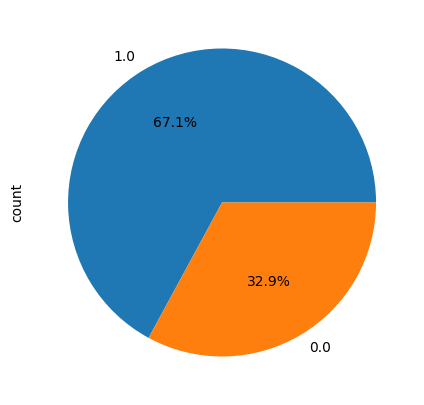

In [106]:
##cheking percentage of students who passed and who failed  
df['passed'].value_counts()
df['passed'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', figsize = (5, 5))



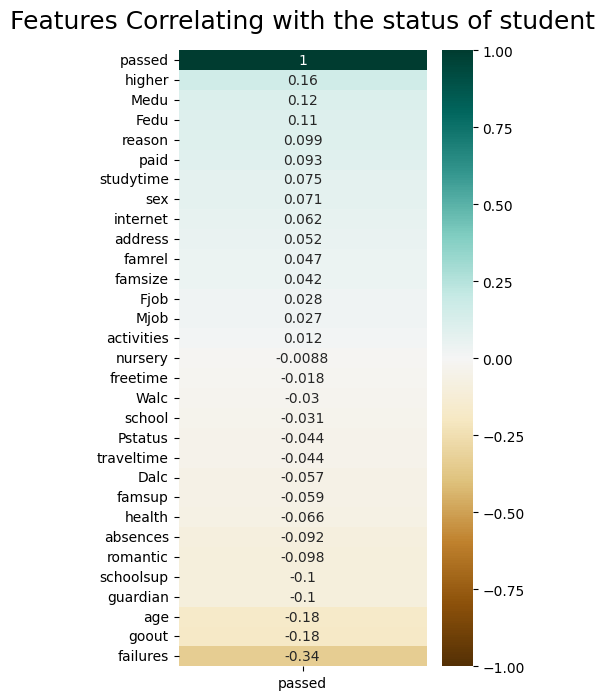

In [109]:
##correlation between passed and other features 
plt.figure(figsize=(4, 8))
heatmap = sns.heatmap(df.corr()[['passed']].sort_values(by='passed', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with the status of student', fontdict={'fontsize':18}, pad=16);

In [ ]:
'''
so from here we get the features that are most posotively correlated to the status and they are :
1. studytime 
2. education of parents and 
and those most negative impactful features are : 
1. long hours if going out with friends
2. romantic relationship 
'''

In [117]:
##so, now we train our model with logistic regression 

X = df.drop(columns = ['passed'])
Y = df['passed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100) # 20% data for testing
logisticRegr = LogisticRegression(C=1)
logisticRegr.fit(X_train,Y_train)

Y_pred=logisticRegr.predict(X_test)
f1 = f1_score(Y_test, Y_pred, average = 'macro')
acc = accuracy_score(Y_test, Y_pred)*100

print ('Accuracy : ', acc, '\nF1 Score : ', f1)

Accuracy :  73.41772151898735 
F1 Score :  0.6541588492808005


In [120]:
##now try with knn algortihm 
X = df.drop(columns = ['passed'])
Y = df['passed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100) # 20% data for testing
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)
f1 = f1_score(Y_test, Y_pred, average = 'macro')
acc = accuracy_score(Y_test, Y_pred)*100

print ('Accuracy : ', acc, '\nF1 Score : ', f1)

Accuracy :  69.62025316455697 
F1 Score :  0.5683060109289617


In [ ]:
##and finally baye's classifier
from sklearn.naive_bayes import GaussianNB
X = df.drop(columns = ['passed'])
Y = df['passed']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=100) # 20% data for testing
gnb = (n_neighbors = 7)
knn.fit(X_train,Y_train)

Y_pred=knn.predict(X_test)
f1 = f1_score(Y_test, Y_pred, average = 'macro')
acc = accuracy_score(Y_test, Y_pred)*100

print ('Accuracy : ', acc, '\nF1 Score : ', f1)